<a href="https://colab.research.google.com/github/daeyeong8855/statistical_data_analysis/blob/main/%ED%86%B5%EA%B3%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EA%B3%B5%EB%B6%84%EC%82%B0_%EC%83%81%EA%B4%80%ED%96%89%EB%A0%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5])
y = np.array([2,4,6,8,10])
z = np.array([3,6,9,12,15])

# 공분산
cov_matrix = np.cov([x,y,z])
print("Covariance Matrix:")
print(cov_matrix)

# 상관행렬
cor_matrix = np.corrcoef([x,y,z])
print(cor_matrix)

threshold = 0.7
for i in range(cor_matrix.shape[0]) :
  for j in range(i+1, cor_matrix.shape[1]) :
    if abs(cor_matrix[i,j]) > threshold :
      print(f"Variable {i+1} and Variable {j+1}")

Covariance Matrix:
[[ 2.5  5.   7.5]
 [ 5.  10.  15. ]
 [ 7.5 15.  22.5]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
Variable 1 and Variable 2
Variable 1 and Variable 3
Variable 2 and Variable 3


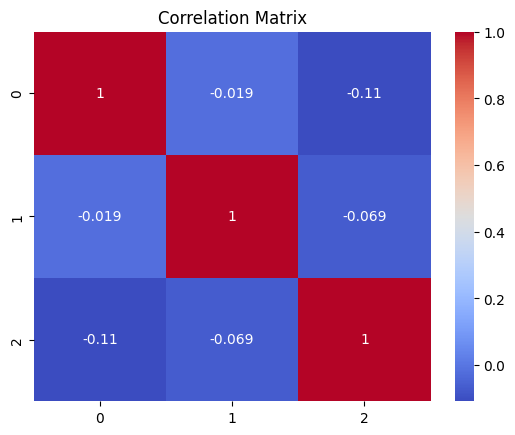

In [13]:
x1 = np.random.normal(0,1,100)
x2 = np.random.normal(0,1,100)
x3 = np.random.normal(0,1,100)

data = np.vstack([x1,x2,x3]).T
cor_matrix = np.corrcoef(data, rowvar=False)

sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

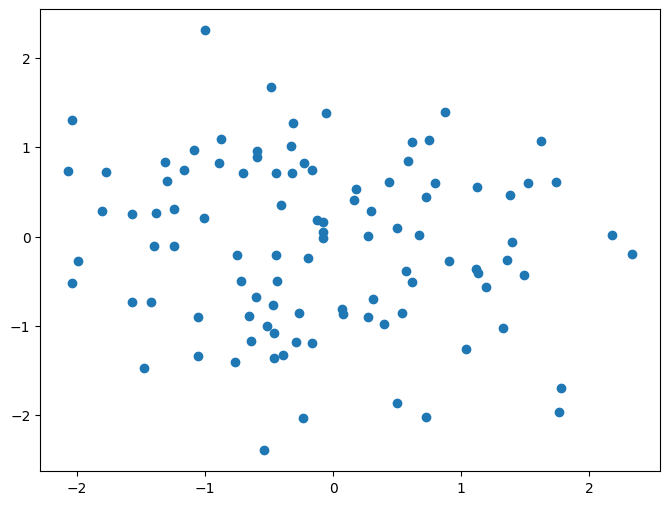

In [16]:
threshold = 0.1
selected_vars = []
for i in range(cor_matrix.shape[0]) :
  for j in range(i+1, cor_matrix.shape[1]) :
    if abs(cor_matrix[i,j]) > threshold :
      selected_vars.extend([i,j])

if selected_vars :
  reduced_data = data[:, list(set(selected_vars))]
  
  plt.figure(figsize=(8,6))
  plt.scatter(reduced_data[:,0], reduced_data[:,1])
  plt.show()

else :
  print('Nothing')

corr 함수는 seaborn 내장 함수

In [19]:
tips = sns.load_dataset('tips')

corr = tips['total_bill'].corr(tips['tip'], method='pearson')
print(corr)

0.6757341092113641


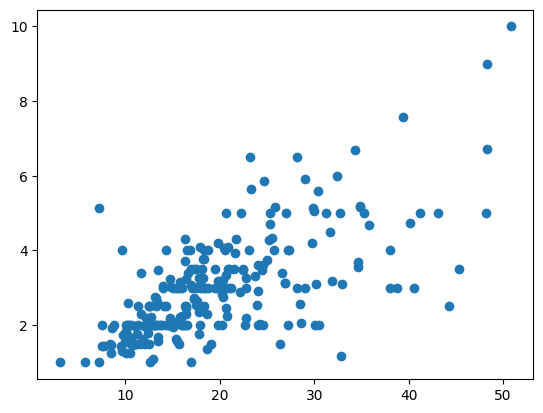

In [22]:
plt.scatter(tips['total_bill'],tips['tip'])

In [24]:
corr = tips.corr()
# corr = tips[['total_bill', 'tip', 'size']].corr()
print(corr)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


<ipython-input-24-65fe19f2e87a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = tips.corr()


In [30]:
Titanic = sns.load_dataset('titanic')
corr = Titanic[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone']].corr()
print(corr)

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  
